#### create dataset

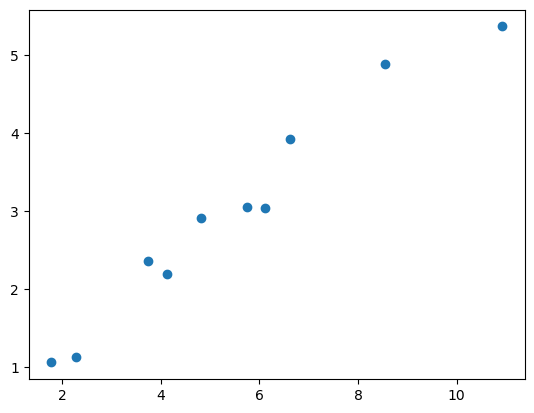

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1.78, 6.12, 6.63, 4.13, 8.55, 10.92, 4.81, 3.75, 2.28, 5.74])
y = np.array([1.06, 3.04, 3.93, 2.19, 4.89, 5.37, 2.91, 2.36, 1.13, 3.05])

plt.scatter(x, y)
plt.show()

#### linear regression using scikit_learn

In [ ]:
def ols_loss(params, x, y):
    w, b = params

    # IMPLEMENT HERE
    # 선형 회귀 예측값 계산: y_hat = w*x + b
    y_hat = w * x + b
    
    # 평균 제곱 오차(MSE) 계산
    mse = np.mean((y - y_hat) ** 2)

    return mse

In [ ]:
from scipy import optimize
# IMPLEMENT HERE
# 최적화를 통해 최적의 w, b 찾기
# 초기값: w=0, b=0
initial_params = [0, 0]

# OLS 손실 함수를 최소화
result = optimize.minimize(ols_loss, initial_params, args=(x, y), method='BFGS')

print(result)
w_opt, b_opt = result.x

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.06684729140805731
        x: [ 5.031e-01  2.403e-01]
      nit: 7
      jac: [-4.284e-08 -6.519e-09]
 hess_inv: [[ 7.138e-02 -3.907e-01]
            [-3.907e-01  2.638e+00]]
     nfev: 24
     njev: 8


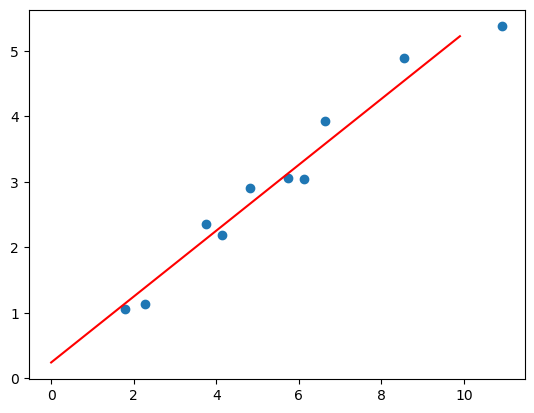

In [ ]:
x_test = np.arange(0, 10, 0.1)
y_hat = w_opt * x_test + b_opt

plt.scatter(x, y)
plt.plot(x_test, y_hat, c='red')
plt.show()

#### linear regression using simple code

In [ ]:
def ols_loss(params, x, y):
    w, b = params

    # IMPLEMENT HERE
    # 선형 회귀 예측값 계산: y_hat = w*x + b
    y_hat = w * x + b
    
    # 평균 제곱 오차(MSE) 계산
    mse = np.mean((y - y_hat) ** 2)

    return mse

In [ ]:
def compute_graident(params, x, y):
    w, b = params
    n = len(x)

    # IMPLEMENT HERE
    # MSE의 그래디언트 계산
    # MSE = (1/n) * Σ(y - (w*x + b))²
    # ∂MSE/∂w = (2/n) * Σ(y - (w*x + b)) * (-x) = (2/n) * Σ(y_hat - y) * x
    # ∂MSE/∂b = (2/n) * Σ(y - (w*x + b)) * (-1) = (2/n) * Σ(y_hat - y)
    
    y_hat = w * x + b
    error = y_hat - y
    
    grad_w = (2/n) * np.sum(error * x)
    grad_b = (2/n) * np.sum(error)

    return np.array([grad_w, grad_b])

def minimize(x, y, learning_rate = 0.01, num_iterations = 1000):
    w, b = 0, 0
    
    print(f"그래디언트 디센트 시작: learning_rate={learning_rate}, iterations={num_iterations}")
    print("=" * 60)
    
    for i in range(num_iterations):
        # IMPLEMENT HERE
        # 현재 파라미터로 그래디언트 계산
        gradient = compute_graident([w, b], x, y)
        
        # 그래디언트 디센트 업데이트
        w = w - learning_rate * gradient[0]
        b = b - learning_rate * gradient[1]
        
        # 진행 상황 출력 (처음 10번과 마지막 5번)
        if i < 10 or i >= num_iterations - 5:
            current_loss = ols_loss([w, b], x, y)
            print(f"Iteration {i+1:4d}: w={w:8.4f}, b={b:8.4f}, loss={current_loss:.6f}")
    
    print("=" * 60)
    print(f"최종 결과: w={w:.4f}, b={b:.4f}, loss={ols_loss([w, b], x, y):.6f}")
    
    return w, b


그래디언트 디센트 시작: learning_rate=0.01, iterations=1000
Iteration    1: w=  0.3979, b=  0.0599, loss=0.715828
Iteration    2: w=  0.4954, b=  0.0750, loss=0.110414
Iteration    3: w=  0.5192, b=  0.0791, loss=0.074026
Iteration    4: w=  0.5250, b=  0.0806, loss=0.071807
Iteration    5: w=  0.5263, b=  0.0814, loss=0.071640
Iteration    6: w=  0.5266, b=  0.0820, loss=0.071597
Iteration    7: w=  0.5266, b=  0.0826, loss=0.071561
Iteration    8: w=  0.5265, b=  0.0832, loss=0.071526
Iteration    9: w=  0.5264, b=  0.0838, loss=0.071491
Iteration   10: w=  0.5264, b=  0.0844, loss=0.071457
Iteration  996: w=  0.5037, b=  0.2363, loss=0.066850
Iteration  997: w=  0.5037, b=  0.2363, loss=0.066850
Iteration  998: w=  0.5037, b=  0.2364, loss=0.066850
Iteration  999: w=  0.5037, b=  0.2364, loss=0.066850
Iteration 1000: w=  0.5037, b=  0.2364, loss=0.066850
최종 결과: w=0.5037, b=0.2364, loss=0.066850
0.5037244251723141 0.23639361345270662


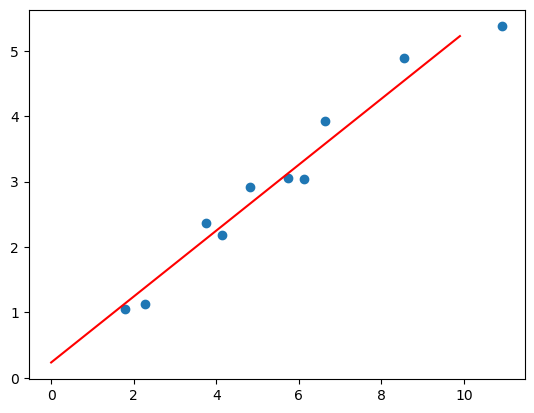

In [7]:
w_opt, b_opt = minimize(x, y)
print(w_opt, b_opt)

x_test = np.arange(0, 10, 0.1)
y_hat = w_opt * x_test + b_opt

plt.scatter(x, y)
plt.plot(x_test, y_hat, c='red')
plt.show()